In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initial_probability_vector(d):
    return [0.5] * d

In [3]:
def binary_random(p):
    sample=np.random.rand()
    if sample < p:
        return 1
    return 0

In [4]:
def random_individual(p_vec):
    res=[]
    for k in range(len(p_vec)):
        res.append(binary_random(p_vec[k]))
    return res

In [5]:
def random_population(p_vec, N):
    res=[]
    for k in range(N):
        res.append(random_individual(p_vec))
    return res

In [6]:
def find_best(population, evaluation_result):
    return population[np.argmax(evaluation_result)]

In [13]:
def eval_indvidual_sample(sample):
    matching_points=0
    for point_number in range(num_of_points):
        point_classification = [0, 0, 0]
        for rule_number in range(num_of_rules):
            rule_point_value=int(float(rules[rule_number][point_number]))
            if sample[rule_number] > 0:
                point_classification[rule_point_value-1] += 1
        chosen_color = np.argmax(point_classification) + 1
        if chosen_color == int(float(bitmap[point_number])):
            matching_points += 1
    return matching_points

In [14]:
def population_eval(population):
    res=[]
    for i in range(len(population)):
        eval_result=eval_indvidual_sample(population[i])
        res.append(eval_result)
    return res

In [15]:
def PBIL(iters, N, theta1, theta2, theta3):
    p_vec=initial_probability_vector(num_of_rules)
    population=random_population(p_vec, N)
    evaluation_result=population_eval(population)
    best_evaluation_results=[]
    mean_evaluation_results=[]
    worst_evaluation_results=[]
    solutions=[]
    for i in range(iters):
        best_individual=find_best(population, evaluation_result)
        best_evaluation_results.append(np.max(evaluation_result))
        mean_evaluation_results.append(np.mean(evaluation_result))
        worst_evaluation_results.append(np.min(evaluation_result))
        solutions.append(best_individual)
        for k in range(num_of_rules):
            p_vec[k] = p_vec[k] * (1 - theta1) + best_individual[k] * theta1
        for k in range(num_of_rules):
            sample=np.random.rand()
            if sample < theta2:
                p_vec[k] = p_vec[k] * (1 - theta3) + binary_random(0.5) * theta3
        population=random_population(p_vec, N)
        evaluation_result=population_eval(population)
    return find_best(solutions, population_eval(solutions)), best_evaluation_results, mean_evaluation_results, worst_evaluation_results

In [16]:
num_of_rules=266
num_of_points=9350
bitmap_file=open("ImageExpertReduced.txt")
bitmap=[]
for line in bitmap_file:
    bitmap += line[2:].split("  ")
rules_file=open("ClassificationRules.txt")
rules=[]
for line in rules_file:
    rules.append(line[2:].split("  "))
print(len(bitmap))
print(len(rules))
print(len(rules[0]))

9350
266
9350


In [17]:
def plot_chart(P):
    plt.figure(figsize=(20, 7))
    plt.plot(P[1], label="Best results")
    plt.plot(P[2], label="Mean results")
    plt.plot(P[3], label="Worst results")
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.show()

Multispectral images problem:
For args : 500, 10, 0.1, 0.5, 0.8


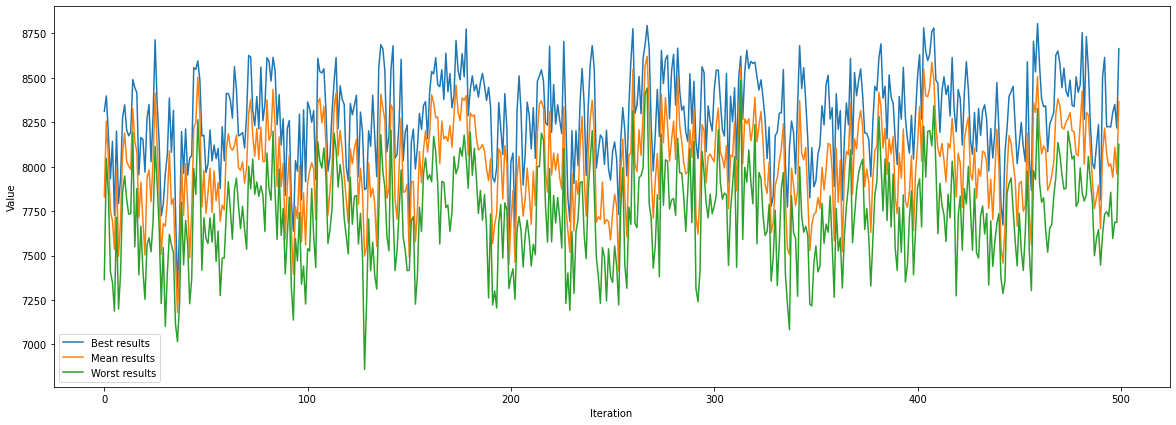

[1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1]
For args : 100, 50, 0.1, 0.5, 0.8


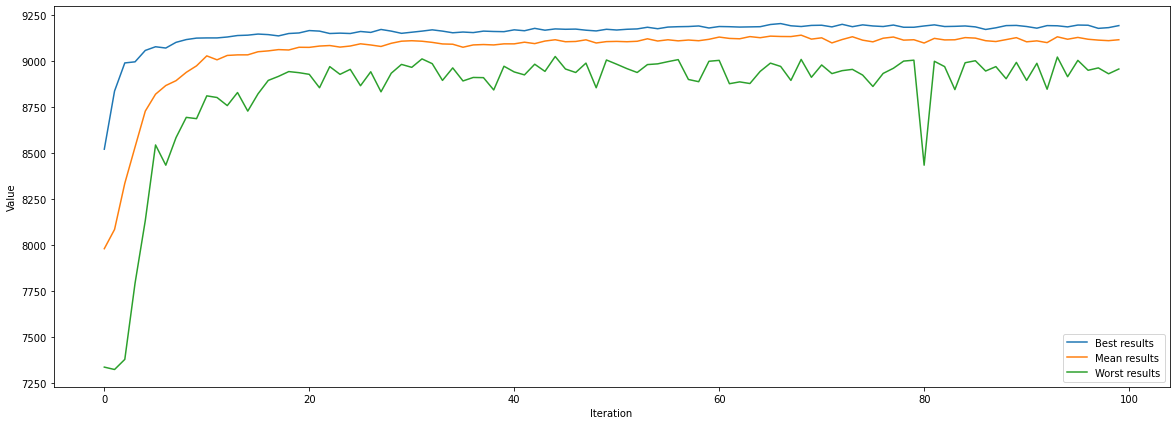

[0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0]


In [18]:
print("Multispectral images problem:")
print("For args : 500, 10, 0.1, 0.5, 0.8")
P=PBIL(500, 10, 0.1, 0.5, 0.8)
plot_chart(P)
print(P[0])
print("For args : 100, 50, 0.1, 0.5, 0.8")
P=PBIL(100, 50, 0.3, 0.1, 0.2)
plot_chart(P)
print(P[0])